# Esteira de Aprendizado de Máquina

Este notebook implementa uma esteira completa de aprendizado de máquina, desde a obtenção dos dados até a avaliação e predição com um modelo treinado. O conjunto de dados utilizado será o **Adult (Census Income) Dataset** do UCI Machine Learning Repository.

In [25]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from scipy.stats import zscore

In [26]:
# Carregar o dataset Adult do UCI
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = [
    'age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
    'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
    'hours_per_week', 'native_country', 'income'
]
df = pd.read_csv(url, names=columns, na_values=' ?', skipinitialspace=True)
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [27]:
# Estatísticas descritivas gerais
df.describe(include='all')

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,32561.000000,32561,3.256100e+04,32561,32561.000000,32561,32561,32561,32561,32561,32561.000000,32561.000000,32561.000000,32561,32561
unique,NaN,9,NaN,16,NaN,7,15,6,5,2,NaN,NaN,NaN,42,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


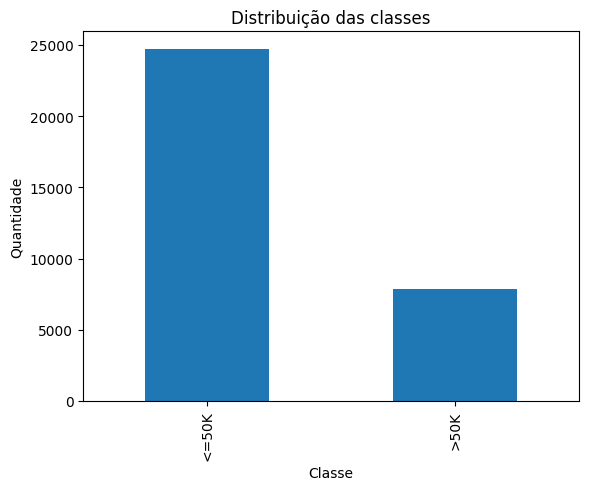

In [28]:
# Visualizar a distribuição das classes
df['income'].value_counts().plot(kind='bar', title='Distribuição das classes')
plt.xlabel('Classe')
plt.ylabel('Quantidade')
plt.show()

In [29]:
# Normalização das features numéricas
# Corrigir nomes das colunas para normalização
# As colunas corretas são: 'age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week'
features = ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']
scaler = StandardScaler()
df[features] = scaler.fit_transform(df[features])
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030671,State-gov,-1.063611,Bachelors,1.134739,Never-married,Adm-clerical,Not-in-family,White,Male,0.148453,-0.21666,-0.035429,United-States,<=50K
1,0.837109,Self-emp-not-inc,-1.008707,Bachelors,1.134739,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.145920,-0.21666,-2.222153,United-States,<=50K
2,-0.042642,Private,0.245079,HS-grad,-0.420060,Divorced,Handlers-cleaners,Not-in-family,White,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
3,1.057047,Private,0.425801,11th,-1.197459,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,-0.145920,-0.21666,-0.035429,United-States,<=50K
4,-0.775768,Private,1.408176,Bachelors,1.134739,Married-civ-spouse,Prof-specialty,Wife,Black,Female,-0.145920,-0.21666,-0.035429,Cuba,<=50K


In [30]:
# Remover outliers (z-score > 3)
from scipy.stats import zscore
z_scores = np.abs(zscore(df[features]))
df = df[(z_scores < 3).all(axis=1)]
df.reset_index(drop=True, inplace=True)
df.shape

(29828, 15)

In [31]:
# Transformação em linha: Remover outliers em 'hours_per_week' (z-score > 3)
df = df[np.abs(zscore(df['hours_per_week'])) < 3]
df.reset_index(drop=True, inplace=True)
df.shape

(29595, 15)

In [32]:
# Separar features e alvo
y = df['income']
X = df.drop(['income'], axis=1)

# Identificar colunas numéricas e categóricas
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

# Pré-processamento: imputação, normalização e one-hot encoding
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), num_cols),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]), cat_cols)
])

# Divisão em treino, validação e teste (60/20/20)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

print(f'Treino: {X_train.shape}, Validação: {X_val.shape}, Teste: {X_test.shape}')

Treino: (17757, 14), Validação: (5919, 14), Teste: (5919, 14)


In [33]:
# Treinamento do modelo com pipeline
clf = Pipeline([
    ('preprocess', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
clf.fit(X_train, y_train)

# Avaliação na validação
y_val_pred = clf.predict(X_val)
acc_val = accuracy_score(y_val, y_val_pred)
print(f'Acurácia na validação: {acc_val:.2f}')

Acurácia na validação: 0.85


Acurácia no teste: 0.85


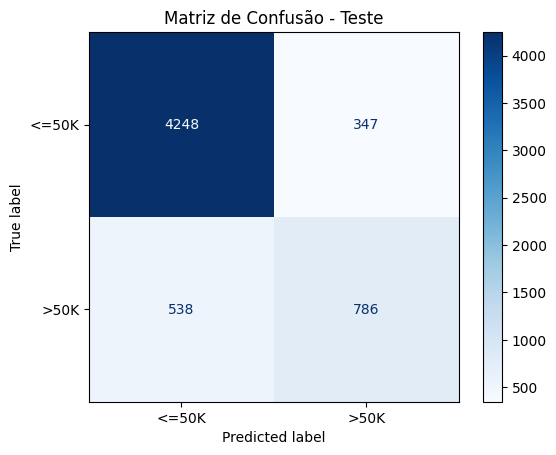

In [34]:
# Avaliação no conjunto de teste
y_test_pred = clf.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred)
print(f'Acurácia no teste: {acc_test:.2f}')

cm = confusion_matrix(y_test, y_test_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão - Teste')
plt.show()

In [35]:
# Predição com o modelo treinado
sample = X_test.iloc[[0]]
pred = clf.predict(sample)
print(f'Classe real: {y_test.iloc[0]}')
print(f'Classe predita: {pred[0]}')

Classe real: <=50K
Classe predita: <=50K


## Conclusão

Este notebook demonstrou uma esteira completa de aprendizado de máquina utilizando o dataset Adult (Census Income), incluindo obtenção, análise, transformação, divisão, treinamento, avaliação e predição.